In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [2]:
df=pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Final_Game_df.xlsx')

In [3]:
df = pd.get_dummies(df,columns=['Away Team'],drop_first=True,prefix='A')

In [4]:
df = pd.get_dummies(df,columns=['Home Team'],drop_first=True,prefix='H')

In [5]:
df = df = pd.get_dummies(df,columns=['Year'],drop_first=True,prefix='Y')

In [6]:
df.drop('Home Score_x_x', axis=1, inplace=True)

In [7]:
df.drop('Date', axis=1, inplace=True)

In [8]:
pd.set_option('Max_columns',None)
pd.set_option('Max_rows',None)

In [9]:
df.dtypes

Home Team Ranking_x                                                int64
Away Team Ranking_x                                                int64
Home Team Spread_x                                               float64
Away Team Spread_x                                               float64
Total_x                                                          float64
Away Score_x_x                                                     int64
Rolling 5 Past Away Score                                          int64
Rolling 5 Past Away Score Avg                                    float64
Rolling 5 Past Away Score Max                                      int64
Rolling 5 Past Away Score Min                                      int64
Rolling 3 Past Away Score                                          int64
Rolling 3 Past Away Score Avg                                    float64
Rolling 3 Past Away Score Max                                      int64
Rolling 3 Past Away Score Min                      

In [10]:
df.shape

(820, 1630)

In [11]:
df.isnull().sum().max()

0

# 4.6 Train/Test Split

In [12]:
len(df) * .7, len(df) * .3

(574.0, 246.0)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Away Score_x_x'), 
                                                    df['Away Score_x_x'], test_size=0.3, 
                                                    random_state=42)

In [14]:
X_train.head()

Home Team Ranking_x  Away Team Ranking_x  Home Team Spread_x  \
234                   99                    7                10.0   
220                   99                   99               -14.0   
311                   99                   11                 7.0   
328                   99                   99               -13.5   
132                   99                   99                -9.5   

     Away Team Spread_x  Total_x  Rolling 5 Past Away Score  \
234               -10.0     47.0                        117   
220                14.0     54.5                        107   
311                -7.0     47.0                        107   
328                13.5     59.0                         85   
132                 9.5     61.0                        136   

     Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
234                           23.4                             28   
220                           21.4                             36   
311                           21.4                             34   
328                           17.0                             30   
132                           27.2                             48   

     Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
234                             14                         69   
220                              6                         94   
311                             10                         63   
328                              3                         52   
132                             10                         89   

     Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
234                      23.000000                             28   
220                      31.333333                             36   
311                      21.000000                             28   
328                      17.333333                             26   
132                      29.666667                             48   

     Rolling 3 Past Away Score Min  Past Away Score  \
234                             14               27   
220                             23               23   
311                             14               28   
328                             10               26   
132                             10               31   

     Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
234                               816                                 163.2   
220                               703                                 140.6   
311                               878                                 175.6   
328                              1033                                 206.6   
132                              1238                                 247.6   

     Rolling 5 Past Away HI Pass yrds Max  \
234                                   308   
220                                   208   
311                                   271   
328                                   369   
132                                   363   

     Rolling 5 Past Away HI Pass yrds Min  Rolling 3 Past Away HI Pass yrds  \
234                                    29                               411   
220                                    45                               569   
311                                    59                               604   
328                                   146                               518   
132                                   148                               750   

     Rolling 3 Past Away HI Pass yrds Avg  \
234                            137.000000   
220                            189.666667   
311                            201.333333   
328                            172.666667   
132                            250.000000   

     Rolling 3 Past Away HI Pass yrds Max  \
234                                   245   
220                                   208   
311                             

In [15]:
X_train.shape

(574, 1629)

In [16]:
X_test.head()

Home Team Ranking_x  Away Team Ranking_x  Home Team Spread_x  \
641                   99                    4                 4.5   
333                   99                   99                 2.0   
67                    13                   99               -13.5   
682                   99                   99                -2.0   
398                   12                   99               -19.0   

     Away Team Spread_x  Total_x  Rolling 5 Past Away Score  \
641                -4.5     51.0                        119   
333                -2.0     56.5                        130   
67                 13.5     46.0                         85   
682                 2.0     42.0                        109   
398                19.0     56.5                         75   

     Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
641                           23.8                             31   
333                           26.0                             44   
67                            17.0                             21   
682                           21.8                             36   
398                           15.0                             27   

     Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
641                             14                         74   
333                              7                         72   
67                               7                         48   
682                             16                         77   
398                              3                         40   

     Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
641                      24.666667                             31   
333                      24.000000                             44   
67                       16.000000                             21   
682                      25.666667                             36   
398                      13.333333                             27   

     Rolling 3 Past Away Score Min  Past Away Score  \
641                             20               31   
333                              7               21   
67                               7               21   
682                             17               17   
398                              3               27   

     Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
641                               975                                 195.0   
333                              1131                                 226.2   
67                                657                                 131.4   
682                              1235                                 247.0   
398                               811                                 162.2   

     Rolling 5 Past Away HI Pass yrds Max  \
641                                   274   
333                                   456   
67                                    212   
682                                   364   
398                                   240   

     Rolling 5 Past Away HI Pass yrds Min  Rolling 3 Past Away HI Pass yrds  \
641                                   115                               675   
333                                   100                               668   
67                                     58                               375   
682                                   174                               887   
398                                   103                               559   

     Rolling 3 Past Away HI Pass yrds Avg  \
641                            225.000000   
333                            222.666667   
67                             125.000000   
682                            295.666667   
398                            186.333333   

     Rolling 3 Past Away HI Pass yrds Max  \
641                                   274   
333                                   456   
67                              

In [17]:
X_test.shape

(246, 1629)

In [18]:
y_train.head()

234    41
220     7
311    24
328    16
132    14
Name: Away Score_x_x, dtype: int64

In [19]:
y_train.shape

(574,)

In [20]:
y_test.head()

641    10
333    30
67     28
682    31
398    32
Name: Away Score_x_x, dtype: int64

In [21]:
y_test.shape

(246,)

In [22]:
train_mean = y_train.mean()
train_mean

23.99128919860627

In [23]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[23.9912892]])

# 4.7.1 Metrics 

4.7.1.1 R-squared, or coefficient of determination

In [24]:
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 -  sum_sq_res / sum_sq_tot
    return R2

In [25]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([23.9912892, 23.9912892, 23.9912892, 23.9912892, 23.9912892])

In [26]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([23.9912892, 23.9912892, 23.9912892, 23.9912892, 23.9912892])

In [27]:
r_squared(y_train, y_tr_pred)

0.0

In [28]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-5.163708451072502e-05

# 4.7.1.2 Mean Absolute Error
#This is very simply the average of the absolute errors:

In [29]:
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(ypred - y)
    mae = np.mean(abs_error)
    return mae

In [30]:
mae(y_train, y_tr_pred)

11.457945343515165

In [31]:
mae(y_test, y_te_pred)

10.723293957678244

In [32]:
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (ypred - y)**2
    mse = np.mean(sq_error)
    return mse

In [33]:
mse(y_train, y_tr_pred)

196.747310881521

In [34]:
mse(y_test, y_te_pred)

186.5382192734322

In [35]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([14.02666428, 13.65789952])

# 4.7.1.3 Mean Squared Error
Another common metric (and an important one internally for optimizing machine learning models) is the mean squared error. This is simply the average of the square of the errors:

In [36]:
#Code task 8#
#Calculate the MSE as defined above
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (ypred - y)**2
    mse = np.mean(sq_error)
    return mse

In [37]:
mse(y_train, y_tr_pred)

196.747310881521

In [38]:
mse(y_test, y_te_pred)

186.5382192734322

In [39]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([14.02666428, 13.65789952])

# 4.7.2 sklearn metrics
Functions are good, but you don't want to have to define functions every time we want to assess performance. sklearn.metrics provides many commonly used metrics, included the ones above.

In [40]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -5.163708451072502e-05)

In [41]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(11.457945343515156, 10.723293957678253)

In [42]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(196.74731088152095, 186.5382192734322)

# 4.7.3 Note On Calculating Metrics
When calling functions to calculate metrics, it is important to take care in the order of the arguments. Two of the metrics above actually don't care if the arguments are reversed; one does. Which one cares?

In a Jupyter code cell, running r2_score? will bring up the docstring for the function, and r2_score?? will bring up the actual code of the function! Try them and compare the source for sklearn's function with yours. Feel free to explore what happens when you reverse the order of the arguments and compare behaviour of sklearn's function and yours.

In [43]:
# train set - sklearn
# correct order, incorrect order
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)

(0.0, 0.0)

In [44]:
# test set - sklearn
# correct order, incorrect order
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)

(-5.163708451072502e-05, -1.6421200390796625e+30)

In [45]:
# train set - using our homebrew function
# correct order, incorrect order
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)


<ipython-input-24-4661c1ed3f49>:13: RuntimeWarning: divide by zero encountered in double_scalars
  R2 = 1.0 -  sum_sq_res / sum_sq_tot


(0.0, -inf)

In [46]:
# test set - using our homebrew function
# correct order, incorrect order
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

(-5.163708451072502e-05, -1.6421200390796625e+30)

# 4.8 Initial Models
4.8.1 Imputing missing feature (predictor) values
Recall when performing EDA, you imputed (filled in) some missing values in pandas. You did this judiciously for exploratory/visualization purposes. You left many missing values in the data. You can impute missing values using scikit-learn, but note that you should learn values to impute from a train split and apply that to the test split to then assess how well your imputation worked.

4.8.1.1 Impute missing values with median
There's missing values. Recall from your data exploration that many distributions were skewed. Your first thought might be to impute missing values using the median.

4.8.1.1.1 Learn the values to impute from the train set

In [47]:
# These are the values we'll use to fill in any missing values
X_defaults_median = X_train.median()
X_defaults_median

Home Team Ranking_x                                                99.000000
Away Team Ranking_x                                                99.000000
Home Team Spread_x                                                 -3.000000
Away Team Spread_x                                                  3.000000
Total_x                                                            50.500000
Rolling 5 Past Away Score                                         115.000000
Rolling 5 Past Away Score Avg                                      23.000000
Rolling 5 Past Away Score Max                                      38.000000
Rolling 5 Past Away Score Min                                      10.000000
Rolling 3 Past Away Score                                          71.000000
Rolling 3 Past Away Score Avg                                      23.666667
Rolling 3 Past Away Score Max                                      34.000000
Rolling 3 Past Away Score Min                                      13.000000

In [48]:
#Code task 9#
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [49]:
#Code task 10#
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

# 4.8.1.1.4 Train the model on the train split

In [50]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [51]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [52]:
# r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(1.0, -0.9634557258204426)

In [53]:
#Code task 12#
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(6.736848786917083e-14, 14.979861020785139)

In [54]:
#Code task 13#
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(8.02333110241396e-27, 366.24062311876236)

# 4.8.1.2 Impute missing values with the mean
You chose to use the median for filling missing values because of the skew of many of our predictor feature distributions. What if you wanted to try something else, such as the mean?

In [55]:
#Code task 14#
#As we did for the median above, calculate mean values for imputing missing values
# These are the values we'll use to fill in any missing values
X_defaults_mean = X_train.mean()
X_defaults_mean

Home Team Ranking_x                                                59.083624
Away Team Ranking_x                                                58.994774
Home Team Spread_x                                                 -2.789199
Away Team Spread_x                                                  2.789199
Total_x                                                            51.410279
Rolling 5 Past Away Score                                         119.801394
Rolling 5 Past Away Score Avg                                      23.960279
Rolling 5 Past Away Score Max                                      38.538328
Rolling 5 Past Away Score Min                                      10.477352
Rolling 3 Past Away Score                                          72.447735
Rolling 3 Past Away Score Avg                                      24.149245
Rolling 3 Past Away Score Max                                      34.355401
Rolling 3 Past Away Score Min                                      14.012195

# 4.8.1.2.2 Apply the imputation to both train and test splits

In [56]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

# 4.8.1.2.3 Scale the data

In [57]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

# 4.8.1.2.4 Train the model on the train split

In [58]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

# .8.1.2.5 Make predictions using the model on both train and test splits

In [59]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

# 4.8.1.2.6 Assess model performance

In [60]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(1.0, -0.9634557258204426)

In [61]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(6.736848786917083e-14, 14.979861020785139)

In [62]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(8.02333110241396e-27, 366.24062311876236)

# 4.8.2 Pipelines
One of the most important and useful components of sklearn is the pipeline. In place of panda's fillna DataFrame method, there is sklearn's SimpleImputer. Remember the first linear model above performed the steps:

# 4.8.2.1 Define the pipeline

In [63]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [64]:
type(pipe)

sklearn.pipeline.Pipeline

In [65]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

In [66]:
#Code task 15#
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [67]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [68]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)


(1.0, -0.9634557258204426)

In [69]:
median_r2

(1.0, -0.9634557258204426)

In [70]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(6.736848786917083e-14, 14.979861020785139)

In [71]:
#Compare with your earlier result:

In [72]:
median_mae

(6.736848786917083e-14, 14.979861020785139)

In [73]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(8.02333110241396e-27, 366.24062311876236)

# Compare with your earlier result:

In [74]:
median_mse

(8.02333110241396e-27, 366.24062311876236)

# 4.9 Refining The Linear Model
You suspected the model was overfitting. This is no real surprise given the number of features you blindly used. It's likely a judicious subset of features would generalize better. sklearn has a number of feature selection functions available. The one you'll use here is SelectKBest which, as you might guess, selects the k best features. You can read about SelectKBest here. f_regression is just the score function you're using because you're performing regression. It's important to choose an appropriate one for your machine learning task.

# 4.9.1 Define the pipeline
Redefine your pipeline to include this feature selection step:

In [75]:
#Code task 16#
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

# 4.9.2 Fit the pipeline

In [76]:
pipe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7ff7d1e2a790>)),
                ('linearregression', LinearRegression())])

In [77]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [78]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.30486850418091016, 0.2609911034518487)

In [79]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.417715678868994, 9.26065348499306)

# 4.9.4 Define a new pipeline to select a different number of features

In [80]:
#Code task 17#
#Modify the `SelectKBest` step to use a value of 15 for k
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression, k=15),
    LinearRegression()
)

# 4.9.5 Fit the pipeline

In [81]:
pipe15.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x7ff7d1e2a790>)),
                ('linearregression', LinearRegression())])

# 4.9.6 Assess performance on train and test data

In [82]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [83]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.31072988510516597, 0.2542464960899855)

In [84]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.341166138328942, 9.315729057253895)

# 4.9.7 Assessing performance using cross-validation

In [85]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [86]:
cv_scores = cv_results['test_score']
cv_scores

array([0.37823546, 0.15486283, 0.19639222, 0.29282071, 0.24249672])

In [87]:
np.mean(cv_scores), np.std(cv_scores)

(0.2529615897922819, 0.07773707848922923)

In [88]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.1 , 0.41])

# 4.9.8 Hyperparameter search using GridSearchCV

In [89]:
#Code task 18#
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [90]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [91]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [92]:
lr_grid_cv.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7ff7d1e2a790>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [93]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [94]:
lr_grid_cv.best_params_

{'selectkbest__k': 31}

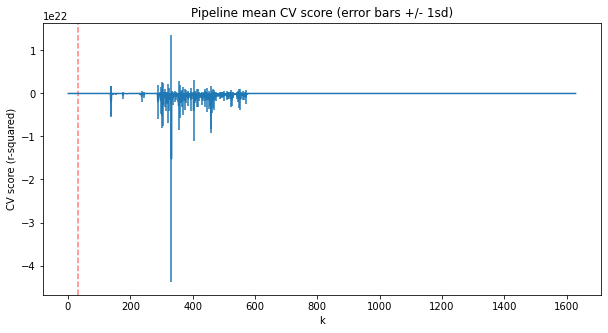

In [95]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [96]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [97]:
#Code task 21#
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Home Team Spread_x                                 3.529567
Rolling 5 Past H&A Spread Min_Away_Team            2.786078
Rolling 3 Past H&A Ranking Avg_Away_Team           2.047100
Rolling 3 Past H&A Ranking_Away_Team               2.047100
Rolling 3 Past Away Ranking                        1.839617
Rolling 3 Past Away Ranking Avg                    1.839617
Rolling 3 Past H&A Spread Avg_Away_Team            0.605198
Rolling 3 Past H&A Spread_Away_Team                0.605198
Rolling 5 Past H&A Total Yards_Away_Team           0.591401
Rolling 5 Past H&A Total Yards Avg_Away_Team       0.591401
Away Team Ranking_x                                0.363316
Rolling 5 Past H&A Yards per Pass Avg_Away_Team    0.138102
Rolling 5 Past H&A Yards per Pass_Away_Team        0.138102
Rolling 5 Past H&A Score_Away_Team                 0.105690
Rolling 5 Past H&A Score Avg_Away_Team             0.105690
Rolling 3 Past Away Spread                         0.070251
Rolling 3 Past Away Spread Avg          

# 4.10 Random Forest Model
A model that can work very well in a lot of cases is the random forest. For regression, this is provided by sklearn's RandomForestRegressor class.

Time to stop the bad practice of repeatedly checking performance on the test split. Instead, go straight from defining the pipeline to assessing performance using cross-validation. cross_validate will perform the fitting as part of the process. This uses the default settings for the random forest so you'll then proceed to investigate some different hyperparameters.

In [98]:
#Code task 22#
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

# 4.10.2 Fit and assess performance using cross-validation

In [99]:
#Code task 23#
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train,y_train, cv=5)

In [100]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.39609693, 0.23795199, 0.27866514, 0.26718769, 0.2580369 ])

In [101]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.2875877312435329, 0.0558694545553107)

In [102]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [103]:
#Code task 24#
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [104]:
#Code task 25#
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [105]:
#Code task 26#
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 88,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [106]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.39596187, 0.23638692, 0.2757    , 0.26828924, 0.26599769])

In [107]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.28846714466366424, 0.05539402471234144)

In [108]:
#Code task 27#
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
#plt.subplots(figsize=(60, 10))
#imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
#rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
#rf_feat_imps.plot(kind='bar')
#plt.xlabel('features')
#plt.ylabel('importance')
#plt.title('Best random forest regressor feature importances');

# 4.11 Final Model Selection

# 4.11.1 Linear regression model performance

In [109]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [110]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(9.424932162749974, 0.5589908646055178)

In [111]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

9.30715258635061

In [112]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [113]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(9.449450454198738, 0.2050942140938908)

In [114]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

9.345205099778271

# 4.12 Data quantity assessment

In [115]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value e

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value e

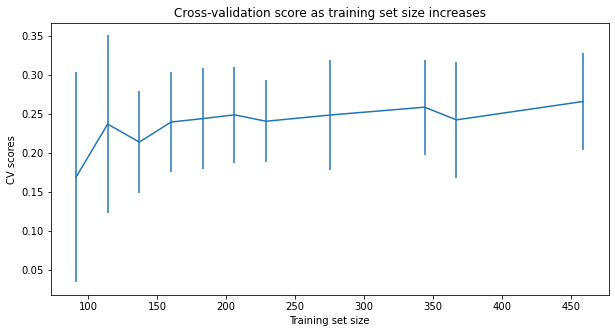

In [116]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');